In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
plt.style.use('fivethirtyeight')

## Read and preprocess data from json


In [2]:
sent_f = open("data/sentiment_data.json")
twitter_f = open("data/tweets.json")
google_dict = json.load(sent_f)
twitter_dict = json.load(twitter_f)

In [3]:
Xs = np.array(list(twitter_dict.values()))
Ys = []
for id in google_dict.keys():
    Ys.append(google_dict[id]["Score"])
Ys = np.array(Ys)
Ys = (Ys*10).astype(int)

#### Create train test split


In [4]:
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(Xs, Ys, test_size=0.15)

#### Tokenize strings so they can go into models


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_seq)

X_train = tokenizer.texts_to_sequences(X_train_seq)
X_test  = tokenizer.texts_to_sequences(X_test_seq)

vocab_size = len(tokenizer.word_index) + 1
maxlen=100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Using TensorFlow backend.


In [6]:
print(X_train_seq[2])
print(X_train[2])
print(X_train_seq[1])
print(X_train[1])

RT @aasthakm: Hi all, I will be joining @UBC_CS as an Asst. Prof. in Jan 2021. I am looking to hire PhD and MS students from diverse backgr…
[  1 220 148  37  18  52  29 192 203   3  44  26 204 162  11 205  98  18
 139  63   4 206  81   6 163   2  31 193 221   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
RT @EduMEE2: Creativity is a muscle. It's not always fostered in traditional education. EduMEE engages students through gaming, which flexs…
[  1 403 330  12  13 404 155  85 294 405  11 406 100 407 408   2 164 409
 184 410   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   

In [7]:
print(f"The document count {tokenizer.document_count}")
print(f"X train shape {np.shape(X_train)}")
print(f"Y train shape {np.shape(y_train)}")
print(f"X test shape {np.shape(X_test)}")
print(f"Y test shape {np.shape(y_test)}")

The document count 1104
X train shape (1104, 100)
Y train shape (1104,)
X test shape (195, 100)
Y test shape (195,)


#### Create baseline data set


In [8]:
rand_X = np.random.randint(low=-10, high=10, size=np.shape(X_test))


## Neural Network

In [52]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 50)           204200    
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 96, 128)           32128     
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 94, 128)           49280     
_________________________________________________________________
flatten_11 (Flatten)         (None, 12032)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 50)                601650    
_________________________________________________________________
dense_41 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

In [53]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

/Users/elicarter/opt/anaconda3/envs/cs302_final/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [54]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2409
Testing Accuracy:  0.1949


In [55]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


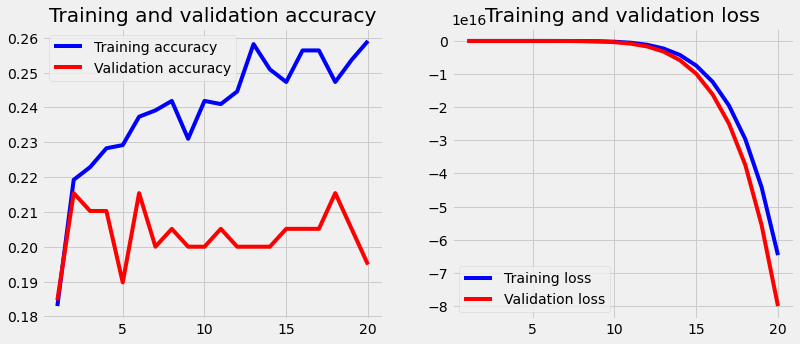

In [56]:
plot_history(history)